In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

common_train_dir = '/content/drive/MyDrive/4geeks_image_classification/dogs_and_cats/train/'
test_data_dir = '/content/drive/MyDrive/4geeks_image_classification/dogs_and_cats/test/'

dog_subfolder = os.path.join(common_train_dir, "dog")
cat_subfolder = os.path.join(common_train_dir, "cat")

os.makedirs(dog_subfolder, exist_ok=True)
os.makedirs(cat_subfolder, exist_ok=True)

In [ ]:
for filename in os.listdir(common_train_dir):
    if filename.startswith("dog"):
        os.rename(os.path.join(common_train_dir, filename), os.path.join(dog_subfolder, filename))

OSError: [Errno 22] Invalid argument: '/content/drive/MyDrive/4geeks_image_classification/dogs_and_cats/train/dog' -> '/content/drive/MyDrive/4geeks_image_classification/dogs_and_cats/train/dog/dog'

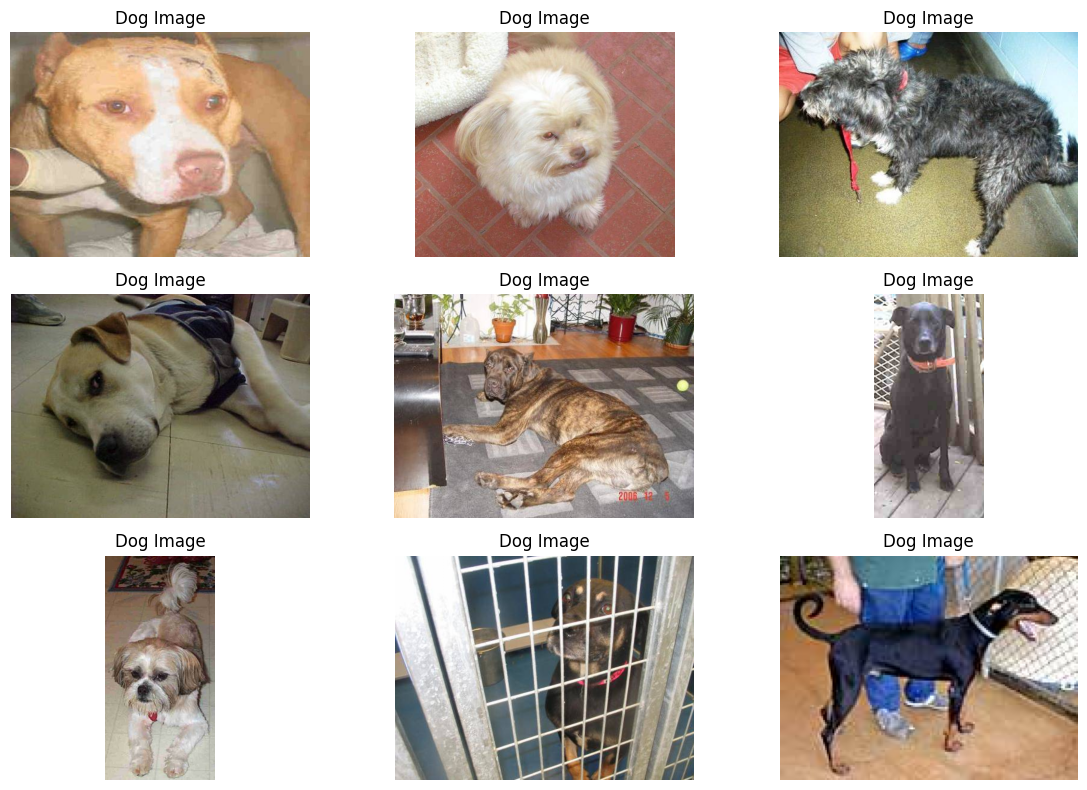

In [ ]:
dog_image_files = os.listdir(dog_subfolder)

dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [ ]:
for filename in os.listdir(common_train_dir):
    if filename.startswith("cat"):
        os.rename(os.path.join(common_train_dir, filename), os.path.join(cat_subfolder, filename))

OSError: [Errno 22] Invalid argument: '/content/drive/MyDrive/4geeks_image_classification/dogs_and_cats/train/cat' -> '/content/drive/MyDrive/4geeks_image_classification/dogs_and_cats/train/cat/cat'

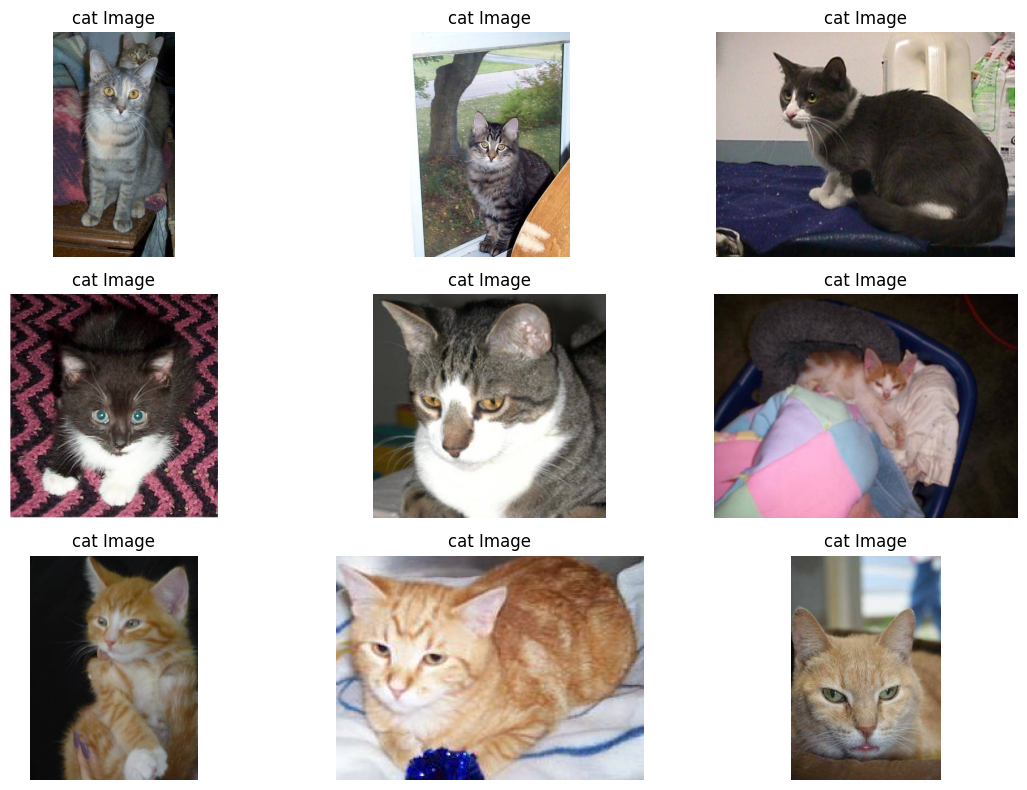

In [ ]:
cat_images = []
cat_image_files = os.listdir(cat_subfolder)

for i in range(9):
    img_path = os.path.join(cat_subfolder, cat_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    cat_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

common_train_dir = '/content/drive/MyDrive/4geeks_image_classification/dogs_and_cats/train/'
test_data = '/content/drive/MyDrive/4geeks_image_classification/dogs_and_cats/test/'
image_size = (224, 224)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    common_train_dir,
    target_size = image_size,
    classes = ["dog", "cat"]
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_data_dir,
    target_size = image_size,
    class_mode=None
)

Found 208 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [ ]:
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [ ]:
model.fit(train_data, epochs = 1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 477s 66s/step - accuracy: 0.4869 - loss: 2372.7119


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
dog


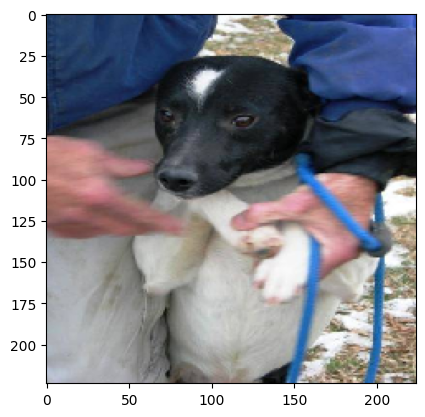

In [ ]:
img = image.load_img("/content/drive/MyDrive/4geeks_image_classification/dogs_and_cats/test/1.jpg", target_size = (224, 224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
output = model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")